In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch8 Times Series/Superstore.xls'
data = pd.read_excel(data_path)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
tech_data = data[data['Category'] == 'Technology']
tech_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [ ]:
tech_data['Order Date'] = pd.to_datetime(tech_data['Order Date'], format='%Y-%m-%d')
tech_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [ ]:
min_date = tech_data['Order Date'].min()
min_date = min_date.date()
max_date = tech_data['Order Date'].max()
max_date = max_date.date()
split_date = pd.to_datetime('2017-11-30', format='%Y-%m-%d')
print(min_date)
print(max_date)
print(split_date)
#.dt.strftime('%Y-%m-%d')

2014-01-06
2017-12-30
2017-11-30 00:00:00


[]

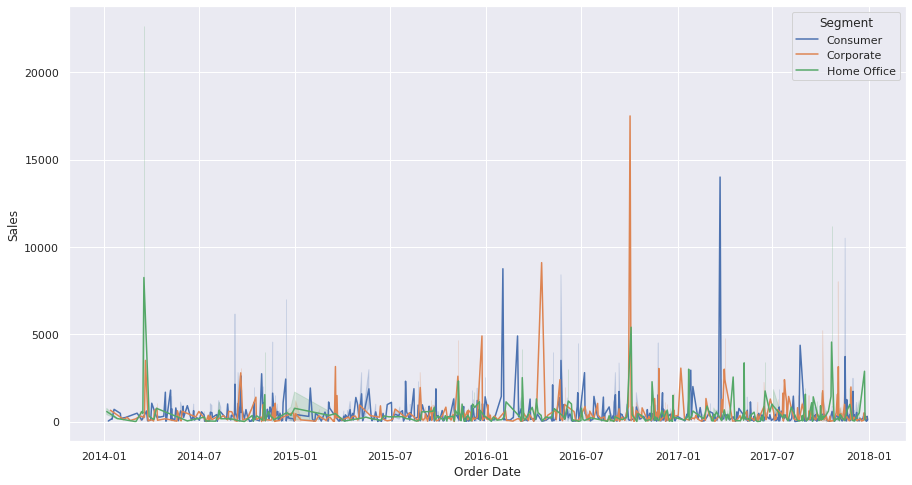

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Order Date', y='Sales', hue='Segment', data=tech_data)
plt.plot()

In [ ]:
tech_data['Month'] = tech_data['Order Date'].dt.month
month_data = tech_data[['Segment', 'Month', 'Sales']].groupby(['Segment','Month']).sum().reset_index()
month_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Segment,Month,Sales
0,Consumer,1,11992.152
1,Consumer,2,14167.752
2,Consumer,3,34587.550
3,Consumer,4,17791.902
4,Consumer,5,43105.033


[]

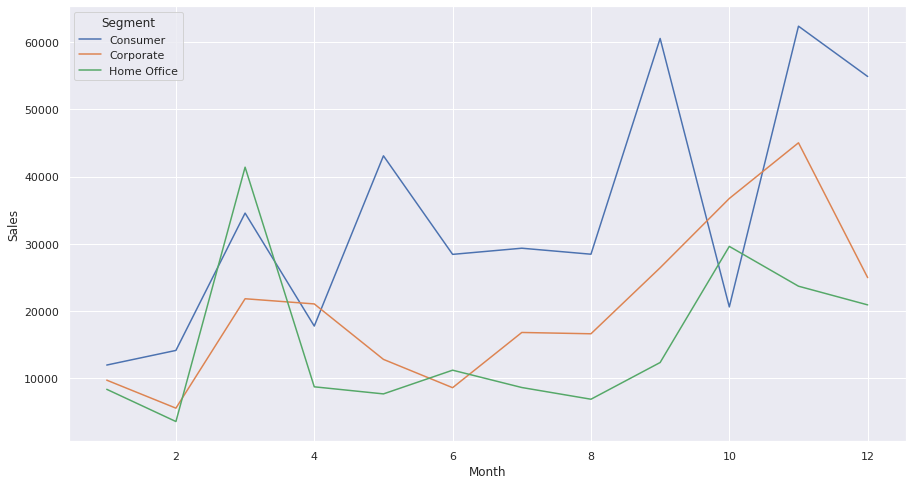

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month', y='Sales', hue='Segment', data=month_data)
plt.plot()

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
tmp_data = tech_data[['Order Date', 'Segment', 'Sales']]
tmp_data = tmp_data[tmp_data['Order Date']<split_date]
cons_data = tmp_data[tmp_data['Segment'] == 'Consumer']
corp_data = tmp_data[tmp_data['Segment'] == 'Corporate']
home_data = tmp_data[tmp_data['Segment'] == 'Home Office']

cons_data = cons_data.drop(['Segment'], axis=1)
corp_data = corp_data.drop(['Segment'], axis=1)
home_data = home_data.drop(['Segment'], axis=1)

In [ ]:
cons_data.head()

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
47,2016-06-20,45.000


In [ ]:
cons_data.columns

Index(['Order Date', 'Sales'], dtype='object')

In [ ]:
cons_data.index

Int64Index([   7,   11,   19,   26,   47,   48,   59,   62,   86,  103,
            ...
            9888, 9895, 9904, 9922, 9929, 9933, 9941, 9983, 9986, 9991],
           dtype='int64', length=902)

In [ ]:
pd.to_datetime('2014-06-09',format="%Y-%m-%d").date() in list(cons_data['Order Date'])

True

In [ ]:
print(len(cons_data))
print(len(corp_data))
print(len(home_data))

902
535
331


In [ ]:
#list_cons_time = list(cons_data['Order Date'].unique])
#list_corp_time = list(corp_data.index)
#list_home_time = list(home_data.index)

for d in pd.date_range(min_date, max_date):
  day = d.date()
  new_data = {'Order Date':day, 'Sales':0}
  if day not in list(cons_data['Order Date']):
    cons_data=cons_data.append(new_data ,ignore_index=True)
  if day not in list(corp_data['Order Date']):
    corp_data=corp_data.append(new_data, ignore_index=True)
  if day not in list(home_data['Order Date']):
    home_data=home_data.append(new_data, ignore_index=True)

In [ ]:
print(len(cons_data))
print(len(corp_data))
print(len(home_data))

1824
1634
1550


In [ ]:
cons_data.tail()

,Order Date,Sales
1819,2017-12-26,0.0
1820,2017-12-27,0.0
1821,2017-12-28,0.0
1822,2017-12-29,0.0
1823,2017-12-30,0.0


In [ ]:
type(home_data['Order Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
cons_data = cons_data.sort_values(by='Order Date')
corp_data = corp_data.sort_values(by='Order Date')
home_data = home_data.sort_values(by='Order Date')
home_data.tail()

,Order Date,Sales
1545,2017-12-26,0.0
1546,2017-12-27,0.0
1547,2017-12-28,0.0
1548,2017-12-29,0.0
1549,2017-12-30,0.0


In [ ]:
cons_data = cons_data.groupby(['Order Date']).sum()
corp_data = corp_data.groupby(['Order Date']).sum()
home_data = home_data.groupby(['Order Date']).sum()

cons_data.head()

,Sales
Order Date,
2014-01-06,0.0
2014-01-07,0.0
2014-01-08,0.0
2014-01-09 00:00:00,31.2
2014-01-10,0.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
cons_model = ARIMA(cons_data, (2,1,2), freq='D')
cons_model = cons_model.fit()
cons_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 1454
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11909.928
Method:                       css-mle   S.D. of innovations            871.075
Date:                Thu, 28 Oct 2021   AIC                          23831.856
Time:                        08:47:25   BIC                          23863.549
Sample:                    01-07-2014   HQIC                         23843.681
                         - 12-30-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0522      0.055      0.944      0.345      -0.056       0.161
ar.L1.D.Sales    -0.9610      0.054    -17.801      0.000      -1.067      -0.855
ar.L2.D.Sales     0.0181      0.026      0.689      0.491      -0.033       0.070
ma.L1.D.Sales    -0.0229      0.047     -0.483      0.629      -0.116       0.070
ma.L2.D.Sales    -0.9771      0.047    -20.662      0.000      -1.070      -0.884
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0210           +0.0000j            1.0210            0.5000
AR.2           54.0682           +0.0000j           54.0682            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0234           +0.0000j            1.0234            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
corp_model = ARIMA(corp_data, (2,1,2), freq='D')
corp_model = corp_model.fit()
corp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 1454
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11700.086
Method:                       css-mle   S.D. of innovations            753.993
Date:                Thu, 28 Oct 2021   AIC                          23412.172
Time:                        08:47:28   BIC                          23443.865
Sample:                    01-07-2014   HQIC                         23423.997
                         - 12-30-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1648      0.047      3.508      0.000       0.073       0.257
ar.L1.D.Sales    -0.9887      0.094    -10.501      0.000      -1.173      -0.804
ar.L2.D.Sales    -0.0017      0.026     -0.063      0.949      -0.053       0.050
ma.L1.D.Sales    -0.0136      0.090     -0.150      0.881      -0.191       0.164
ma.L2.D.Sales    -0.9864      0.090    -10.908      0.000      -1.164      -0.809
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0131           +0.0000j            1.0131            0.5000
AR.2         -590.4581           +0.0000j          590.4581            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0137           +0.0000j            1.0137            0.5000
-----------------------------------------------------------------------------
"""

In [1]:
#from pmdarima.arima import auto_arima
#model = auto_arima(home_data, start_p=0, start_q=0)
#model.summary()

ModuleNotFoundError: ignored

In [ ]:
home_model = ARIMA(home_data, (2,1,2), freq='D')
home_model = home_model.fit()
home_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 1454
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11879.452
Method:                       css-mle   S.D. of innovations            852.736
Date:                Thu, 28 Oct 2021   AIC                          23770.904
Time:                        08:47:30   BIC                          23802.597
Sample:                    01-07-2014   HQIC                         23782.729
                         - 12-30-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0723      0.054      1.343      0.179      -0.033       0.178
ar.L1.D.Sales    -0.9877      0.026    -37.638      0.000      -1.039      -0.936
ar.L2.D.Sales     0.0103      0.026      0.392      0.695      -0.041       0.062
ma.L1.D.Sales -3.587e-07      0.003     -0.000      1.000      -0.006       0.006
ma.L2.D.Sales    -1.0000      0.003   -332.533      0.000      -1.006      -0.994
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0019           +0.0000j            1.0019            0.5000
AR.2           96.8755           +0.0000j           96.8755            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
cons_fore = cons_model.forecast(steps=30)
corp_fore = corp_model.forecast(steps=30)
home_fore = home_model.forecast(steps=30)

forecast = np.sum([cons_fore[0] ,corp_fore[0] , home_fore[0]], axis=0)
forecast.shape

(30,)

In [ ]:
forecast

array([773.07462812, 760.99046967, 780.09584845, 761.99284688,
       780.38025412, 762.86110509, 780.67593211, 763.71628899,
       780.98435608, 764.55901097, 781.30496336, 765.3898222 ,
       781.63721474, 766.20925019, 781.98059414, 767.01779985,
       782.3346076 , 767.81595443, 782.69878237, 768.60417639,
       783.07266602, 769.38290835, 783.45582556, 770.15257385,
       783.84784668, 770.91357821, 784.24833289, 771.66630924,
       784.65690484, 772.41113803])

In [ ]:
tech_data['Year'] = tech_data['Order Date'].dt.year
target = tech_data[(tech_data['Year']==2017) &(tech_data['Month']==12)][['Order Date','Sales']]
#day_data = tech_data[['Order Date', 'Month', 'Day', 'Sales']].groupby(['Month', 'Day']).sum().reset_index()
#target = day_data[day_data['Month']==12][['Order Date','Sales']]
target =target.sort_values(by='Order Date')
target = target.groupby('Order Date').sum()
target.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales
Order Date,
2017-12-01,1417.436
2017-12-02,3758.066
2017-12-03,364.070
2017-12-04,1447.718
2017-12-05,335.596


In [ ]:
len(target)

23

In [ ]:
cnt = 0
for d in pd.date_range('2017-12-01', periods=30):
  print(d.date())
  if d not in list(target.index):
    cnt+=1
    continue
  target.loc[d, 'forecast'] = forecast[cnt]
  cnt+=1
  #print(target.loc[d]['Sales'])


#target['forecast'] = forecast
#target.head()

2017-12-01
add target
2017-12-02
add target
2017-12-03
add target
2017-12-04
add target
2017-12-05
add target
2017-12-06
2017-12-07
add target
2017-12-08
add target
2017-12-09
add target
2017-12-10
add target
2017-12-11
add target
2017-12-12
2017-12-13
2017-12-14
add target
2017-12-15
add target
2017-12-16
add target
2017-12-17
2017-12-18
add target
2017-12-19
2017-12-20
2017-12-21
add target
2017-12-22
add target
2017-12-23
add target
2017-12-24
add target
2017-12-25
add target
2017-12-26
2017-12-27
add target
2017-12-28
add target
2017-12-29
add target
2017-12-30
add target


In [ ]:
target.head()

,Sales,forecast
Order Date,,
2017-12-01,1417.436,773.074628
2017-12-02,3758.066,760.990470
2017-12-03,364.070,780.095848
2017-12-04,1447.718,761.992847
2017-12-05,335.596,780.380254


[]

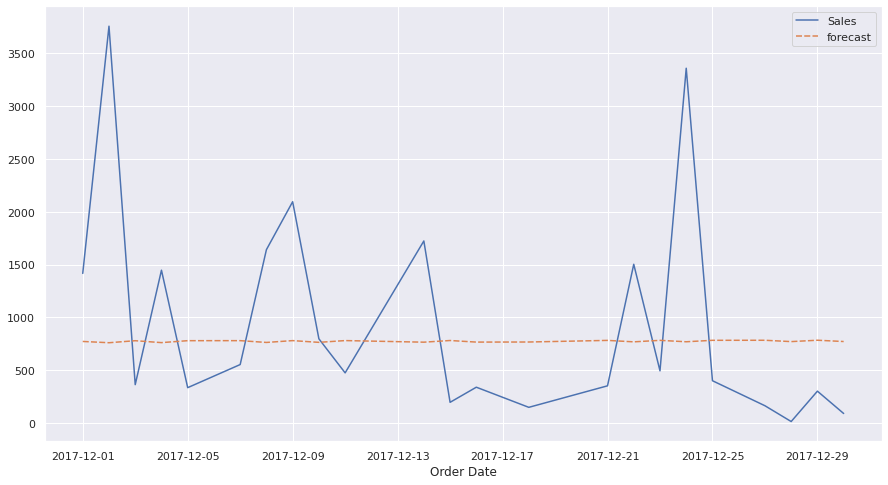

In [ ]:
sns.lineplot( data=target)
plt.plot()

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(target['Sales'], target['forecast'])
MSE

1044605.4496219145

In [ ]:
np.sqrt(MSE)

# https://partrita.github.io/posts/regression-error/

1022.0594158961183